# Distributions of Total Compensation for San Francisco Employees
## by Brice Pulley

## Investigation Overview

> > This is a dataset of employees of the City of San Francisco, from 2013-2019, that includes nearly 300,000 entries. The data was gathered from [DataSF](https://datasf.org/), which is an opensource data site helping the city to thrive through the use of data. This dataset explores total compensation which is made of up salaries and benefits, and contains information about the job, the year, department, etc. This will explore the relationships between certain variables that make up total compensation.

## Dataset Overview

> There are 297,106 entries of city employees over a 7 year period (2013-2019) with 13 columns or variables. There are 9 numeric variables which are most likely highly correlated due to the fact that three of them are products of the other 7 variables. There are 4 variables that are a mix of categorical data, and object.

> `total_comp` = `total_salary` + `total_benefit`
    
> `total_benefit` = `retirement` + `other_benefit` + `health_dental`
    
> `total_salary` = `base_salary` + `overtime` + `other_salary`

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
# intial formatting of the data before we read the file in
# helps reduce clutter and noise when displaying numbers
pd.set_option('float_format', '{:.02f}'.format)

In [2]:
# load in the dataset into a pandas dataframe
sf_data = pd.read_csv('master_sf_salary.csv')
sf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215600 entries, 0 to 215599
Data columns (total 21 columns):
emp_id              215600 non-null int64
year                215600 non-null int64
org_group           215600 non-null object
job                 215600 non-null object
base_salary         215600 non-null float64
overtime            215600 non-null float64
other_salary        215600 non-null float64
total_salary        215600 non-null float64
retirement          215600 non-null float64
health_dental       215600 non-null float64
other_benefit       215600 non-null float64
total_benefit       215600 non-null float64
total_comp          215600 non-null float64
log_salary          215600 non-null float64
log_total_comp      215600 non-null float64
log_total_salary    215600 non-null float64
cr_overtime         215600 non-null float64
cr_other_salary     215600 non-null float64
cr_retirement       215600 non-null float64
cr_other_benefit    215600 non-null float64
cr_total_benefi

In [3]:
# make year categorical for analysis later
# make emp_id an object since the numerical representation cannot be evaluated statistically
sf_data['year'] = sf_data['year'].astype('object')
sf_data['emp_id'] = sf_data['emp_id'].astype('object')

In [4]:
# set continuous variables
variables = ['base_salary', 'overtime', 'other_salary', 'total_salary', 'retirement',
       'health_dental', 'other_benefit', 'total_benefit', 'total_comp']

In [5]:
# tick converter for x-axis
def thousands(x, pos):
    '''The two args are the value and tick position'''
    return '%1.fK' % (x * 1e-3)
format_x = FuncFormatter(thousands)
def x_format():
    x_tick_form = ax.xaxis.set_major_formatter(format_x)
    return x_tick_form
# tick converter for y-axis
def thousands(y, pos):
    '''The two args are the value and tick position'''
    return '%1.fK' % (y * 1e-3)
format_y = FuncFormatter(thousands)
def y_format():
    y_tick_form = ax.yaxis.set_major_formatter(format_y)
    return y_tick_form
# cuberoot converter
def cr_trans(x, inverse = False):
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
# log converter
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [6]:
sf_data.describe()

,base_salary,overtime,other_salary,total_salary,retirement,health_dental,other_benefit,total_benefit,total_comp,log_salary,log_total_comp,log_total_salary,cr_overtime,cr_other_salary,cr_retirement,cr_other_benefit,cr_total_benefit
count,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00,215600.00
mean,80144.95,6258.73,4262.83,90666.13,16035.52,12929.72,5957.67,36509.53,127175.66,4.86,5.07,4.91,10.00,11.18,24.27,17.43,32.53
std,35762.61,13031.53,7444.76,42703.15,7716.11,6846.22,3679.75,14076.53,53885.67,0.19,0.19,0.20,11.54,8.92,5.31,3.56,4.74
min,302.14,0.00,0.00,31200.00,0.00,0.00,0.00,0.00,31694.91,2.48,4.50,4.49,0.00,0.00,0.00,0.00,0.00
25%,54703.00,0.00,0.00,59269.60,11049.71,8937.62,3449.86,26735.65,88057.08,4.74,4.94,4.77,0.00,0.00,22.27,15.11,29.90
50%,72144.00,160.72,1440.00,80932.99,14840.28,12424.50,5422.99,36512.52,117906.52,4.86,5.07,4.91,5.44,11.29,24.57,17.57,33.18
75%,101039.35,6698.11,5564.54,114165.00,20514.87,13342.78,7668.64,45545.23,159200.41,5.00,5.20,5.06,18.85,17.72,27.38,19.72,35.71
max,537847.86,304546.25,342802.63,537847.86,105052.98,36609.50,37198.60,151681.66,689529.52,5.73,5.84,5.73,67.28,69.99,47.18,33.38,53.33


## Distribution of Total Salary

> The range for `total_salary` is 31,200 up to 537,847.86 dollars. It is mostly unimodal with a right-skew and put on a logarithmic scale to even out the distribution. Also, x-limits were put into place to center the distribution as well. This is a moslty normalized distribution. 

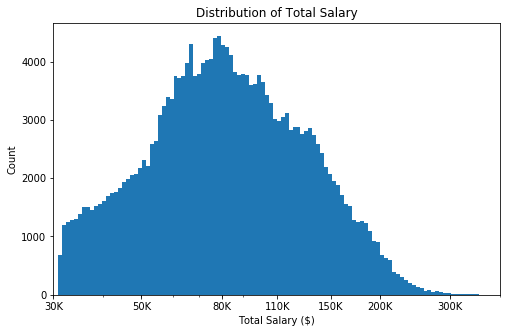

In [43]:
# both distributions are gonna take on a log-scale transformaton 
# added x limits in zoom in on distributions
fig, ax = plt.subplots(figsize = [8, 5])
x_ticks = [30000, 50000, 80000, 110000, 150000, 200000, 300000]
bins = 10 ** np.arange(4.49, 5.73 + 0.01, 0.01)
plt.hist(data = sf_data, x = "total_salary", bins = bins);
plt.title('Distribution of Total Salary')
plt.xlabel('Total Salary ($)')
plt.ylabel('Count');
plt.xscale('log');
x_format();
plt.xticks(x_ticks);
plt.xlim(30000, 400000);

## Distribution of Total Benefits

> As you can see, `total_benefit` is bi-modal, with a lower peak around 20,000 dollar, and a second higher peak around 43,000 dollars. The bi-modal distribution is most likely caused by the `health_dental` variable with its multimodal variation. This distribution was put on a cube-root transformation to normalize the data.

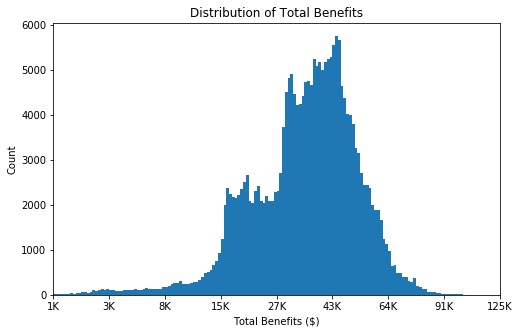

In [13]:
# needed to get the cube root of total_benefits isolated
tot_bene = sf_data.total_benefit
cube_tot_bene = np.cbrt(tot_bene)
fig, ax = plt.subplots(figsize = [8, 5])
x_ticks = [10, 15, 20, 25, 30, 35, 40, 45, 50]
tick_labels = ['1K', '3K', '8K', '15K', '27K', '43K', '64K', '91K', '125K']
bins = np.arange(0, 53.33 + 0.25, 0.25)
plt.hist(x = cube_tot_bene, bins = bins);
plt.xlabel('Total Benefits ($)');
plt.xticks(x_ticks, tick_labels);
plt.ylabel('Count')
plt.title('Distribution of Total Benefits')
plt.xlim(10, 50);

## Distribution of Total Compensation by Job

> > Custodian has the smallest distribution of total compensation and the lowest median. This follows conventions that a lower-skilled worker would be paid the least and have less room for advancement or flexibility in salary or benefits. 
> Registered Nurse has the highest median total compensation and a wider range of the distribution of total compensation. This is understandable because Nurses are highly skilled and highly educated workers. It would be interesting to see the distribution of their pay. 

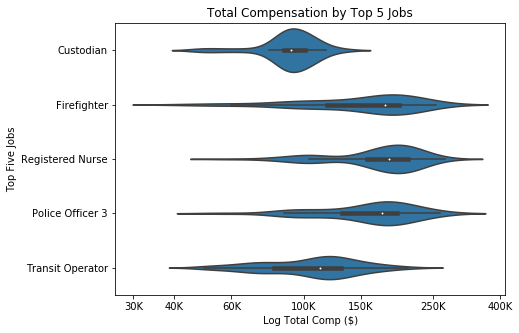

In [45]:
# BY JOB BY TOTAL_COMP
base_color = sb.color_palette()[0]
top_five_job = sf_data.job.value_counts().sort_values(ascending = False).head(5).index
# take a sample of the dataset so the scatterplot will process quicker
np.random.seed(2018)
sample = np.random.choice(sf_data.shape[0], 2000, replace = False)
sf_subset = sf_data.iloc[sample]

# get job subset
job_subset = (sf_subset[sf_subset.job.isin(top_five_job)])

fig, ax = plt.subplots(figsize = [7, 5])
sb.violinplot(data = job_subset, y = 'job', x = 'log_total_comp', color = base_color)
ax.tick_params(axis = 'both', which = 'major',labelsize = 10)
plt.xticks(log_trans(np.array([30000, 40000, 60000, 100000, 150000, 250000, 400000])),
          ['30K', '40K', '60K', '100K', '150K', '250K', '400K'])
plt.xlabel('Log Total Comp ($)')
plt.ylabel('Top Five Jobs');
plt.title('Total Compensation by Top 5 Jobs');

## Look Between Total Salary and Total Benefit by Job

> The scattor plot of `log_total_salary` v `total_benefit` shows a positive linear trend. A color code of the top 5 jobs was applied to see which ones are more correlated.  Police Officer 3 is the least linear while Registered Nurse is the most linear. Firefighter looks the same as Police Officer 3. This might have something to do with the `other_benefits` having the option to opt out. A faceted grid might have a better view.

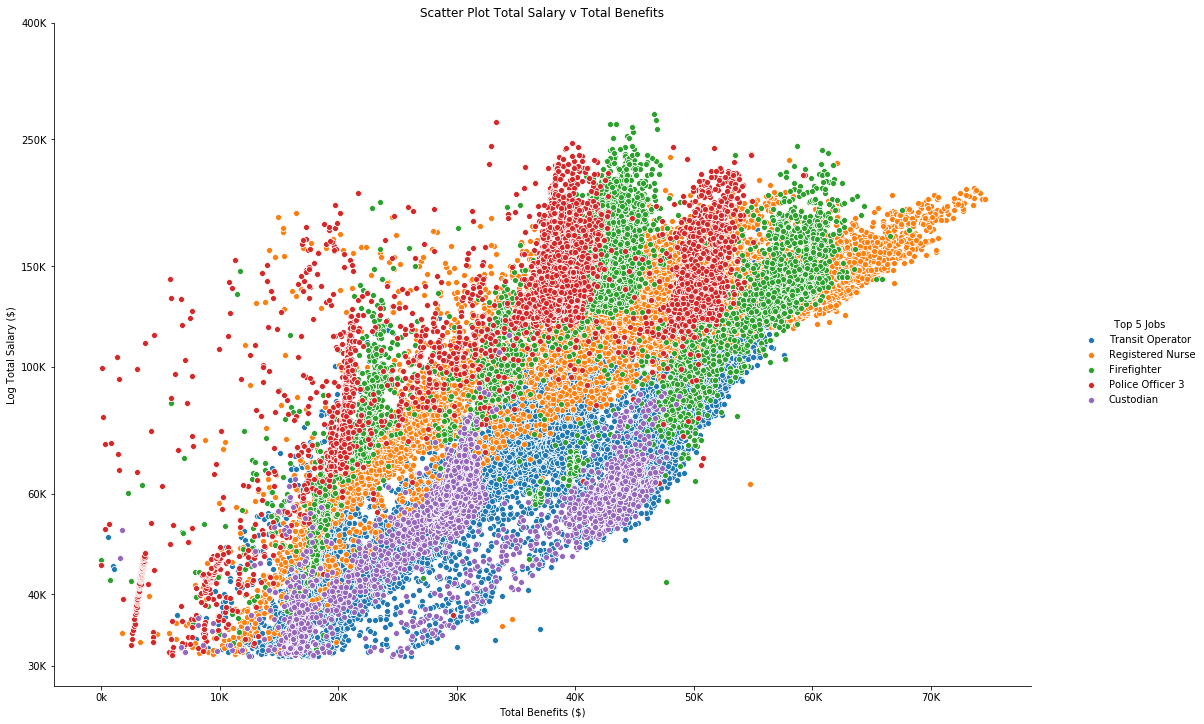

In [42]:
job_sub = (sf_data[sf_data.job.isin(top_five_job)])
g = sb.FacetGrid(data = job_sub, hue = 'job', hue_order = top_five_job,
                height = 10, aspect = 1.5, margin_titles = True)
g.map(sb.scatterplot, 'total_benefit',
      'log_total_salary').set(yticks=log_trans(np.array([30000, 40000, 60000,
                                                         100000, 150000, 
                                                         250000, 400000])),
                              title = 'Scatter Plot Total Salary v Total Benefits');
g.add_legend(title=' Top 5 Jobs');
g.set_ylabels('Log Total Salary ($)');
g.set_yticklabels(['30K', '40K', '60K', '100K', '150K', '250K', '400K'])
g.set_xticklabels([0, '0k', '10K', '20K', '30K', '40K', '50K', '60K', '70K'])
g.set_xlabels('Total Benefits ($)');

## Total Salary v Total Benefit by Job

> A faceted view shows that Registered Nurse is the most strongly correlated between `total_salary` and `total_benefit` because the points are more tightly clustered. Police Office 3 is the weakest along with Firefighter, which makes sense because those jobs had the most variability in `total_salary` and `total_benefit`. Transit Operator and Custodian follow similiar trends because they are the least skilled workers and earlier were shown to have the least variability in pay. 

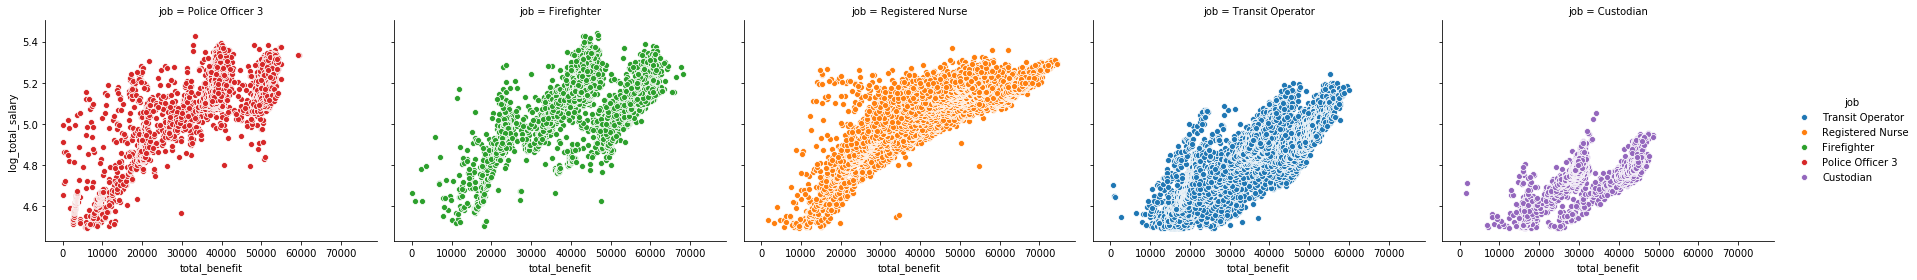

In [11]:
g = sb.FacetGrid(data = job_sub, col = 'job',
                 hue = 'job', height = 4, aspect = 1.25, hue_order = top_five_job)
g.map(sb.scatterplot, 'total_benefit', 'log_total_salary');
g.add_legend();